In [1]:
import numpy as np
import pandas as pd
from scipy.special import erf
from scipy.stats import norm
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import lognorm

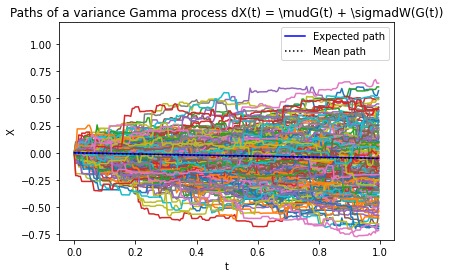

In [6]:
#Simulate a time-changed arithmetic Brownian motion: the variance gamma process
#dX(t) = mu*dG(t) + sigma*dW(G(t))

#Define parameters and time grid
npaths = np.power(10,4)*2 # number of paths
T = 1 # time horizon
nsteps = 200 # number of time steps
dt = T/nsteps # time step
t = np.arange(0,T,dt) # observation times
mu = -0.05; sigma = 0.3 # model parameters of the ABM
kappa = 0.05 # scale parameter of the gamma process = 1/beta = 1/rate

#Monte Carlo

#Compute the increments of the gamma process
dG=np.random.gamma(dt/kappa,kappa,[npaths,nsteps])

#Compute the increments of the ABM on the gamma random clock
dX = mu*dG + sigma*np.random.randn(npaths,nsteps)*np.sqrt(dG)

#Accumulate the increments
X=np.insert(dX,0,0,axis=1)
X=np.delete(X,-1,axis=1)
X=np.cumsum(X,axis=1)

#Expected, mean and sample path
EX=mu*t #expected path
df=pd.concat([pd.Series(x) for x in X],axis=1)
mean_paths=df.apply(lambda row: np.mean(row),axis=1) #mean per step
for i in range(int(nsteps)):
    plt.plot(t,X[i])
plt.plot(t,EX,'b',label='Expected path')
plt.plot(t,mean_paths,':k',label='Mean path')
plt.legend()
plt.xlabel('t')
plt.ylabel('X')
plt.ylim([-0.8,1.2])
plt.title('Paths of a variance Gamma process dX(t) = \mudG(t) + \sigmadW(G(t))')
plt.show()

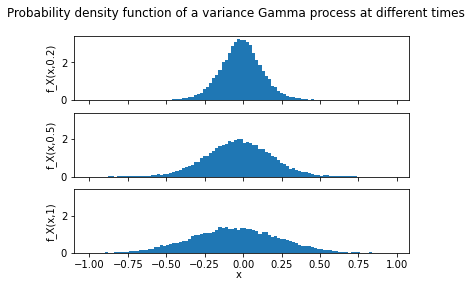

In [8]:
#Probability density function at different times
x=np.arange(-1,1,0.02)
fig, axs = plt.subplots(3,sharex=True,sharey=True)
fig.suptitle('Probability density function of a variance Gamma process at different times')
axs[0].hist(X[:,40],bins=x,density=True)
axs[0].set_ylabel('f_X(x,0.2)')
axs[1].hist(X[:,100],bins=x,density=True)
axs[1].set_ylabel('f_X(x,0.5)')
axs[2].hist(X[:,-1],bins=x,density=True)
axs[2].set_ylabel('f_X(x,1)')
fig.text(0.5,0.04,'x')
plt.show()